In [1]:
import numpy as np

#PARAMETROS
lambda_poisson = 1  #NUMERO DE SINIESTROS
media_gamma = 2000000  #COSTO PROM SINIESTROS

#SIMULACIONES
n_simulaciones = 10000

#LISTA DE ALMACENAMIENTO
costos_totales_simulados = []

for _ in range(n_simulaciones):
    #SIMULACION PISSON
    num_siniestros = np.random.poisson(lambda_poisson)

    #SIMULACION SINIESTRO Y CALCULO COSTO TOTAL
    if num_siniestros > 0:
        costos_siniestros = np.random.gamma(shape=media_gamma / 1000000, scale=1000000, size=num_siniestros)
        costo_total = np.sum(costos_siniestros)
    else:
        costo_total = 0  #SI NO SE PRESENTAN SINIESTROS

    costos_totales_simulados.append(costo_total)

#COSTO PROM CARTEERA PROXIMO AÑO
costo_promedio = np.mean(costos_totales_simulados)

print(f"El costo promedio estimado de la cartera para el próximo año es aproximadamente {costo_promedio:,.2f} COP.")



El costo promedio estimado de la cartera para el próximo año es aproximadamente 1,992,262.50 COP.


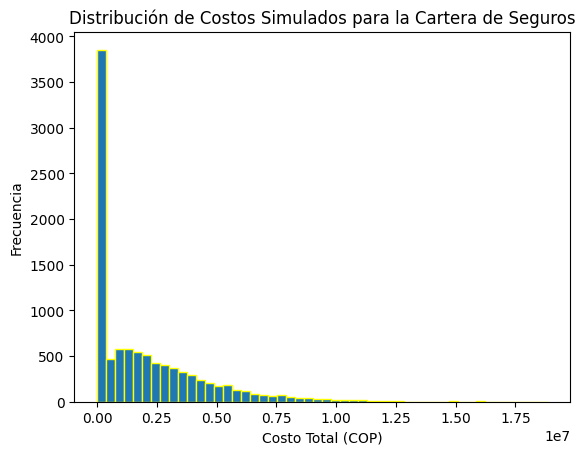

In [4]:
import matplotlib.pyplot as plt
plt.hist(costos_totales_simulados, bins=50, edgecolor='yellow')
plt.xlabel('Costo Total (COP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Costos Simulados para la Cartera de Seguros')
plt.show()

In [13]:
import pandas as pd

#MONTO MAXIMO DEL PRESTAMO
def calcular_monto_prestamo(valor_inmueble, porcentaje_financiacion):
    return valor_inmueble * porcentaje_financiacion

#TASA EA A EM
def convertir_tasa_efectiva_mensual(tasa_efectiva_anual, meses_por_ano):
    return (1 + tasa_efectiva_anual) ** (1 / meses_por_ano) - 1

#CALCULO DE CUOTA MENSUAL
def calcular_cuota_mensual(monto_prestamo, tasa_efectiva_mensual, plazo_anos, meses_por_ano):
    n_periodos = plazo_anos * meses_por_ano
    return monto_prestamo * (tasa_efectiva_mensual / (1 - (1 + tasa_efectiva_mensual) ** -n_periodos))

#AMORTIZACION
def generar_tabla_amortizacion(monto_prestamo, tasa_efectiva_mensual, cuota_mensual, plazo_anos, meses_por_ano):
    amortizacion = []
    saldo = monto_prestamo
    n_periodos = plazo_anos * meses_por_ano

    for mes in range(1, n_periodos + 1):
        interes = saldo * tasa_efectiva_mensual
        abono_capital = cuota_mensual - interes
        saldo -= abono_capital
        #AJUSTE DE SALDO ULTIMA CUOTA = 0
        if mes == n_periodos:
            saldo = 0
        amortizacion.append([mes, cuota_mensual, interes, abono_capital, saldo])

    #TABLA DE AMORTIZACION
    return pd.DataFrame(amortizacion, columns=["Mes", "Cuota", "Interés", "Abono a Capital", "Saldo"])

#FUNCION PRINCIPLA PARA LA TABLA DE AMORTIZACION
def main():
    #DATOS
    valor_inmueble = 300000000
    porcentaje_financiacion = 0.70
    tasa_efectiva_anual = 0.13  #EA
    plazo_anos = 20  #240 MESES
    meses_por_ano = 12

    #MONTO MAXIMO DEL PRESTAMO
    monto_prestamo = calcular_monto_prestamo(valor_inmueble, porcentaje_financiacion)

    #EA A EM
    tasa_efectiva_mensual = convertir_tasa_efectiva_mensual(tasa_efectiva_anual, meses_por_ano)

    #CUOTA MENSUAL
    cuota_mensual = calcular_cuota_mensual(monto_prestamo, tasa_efectiva_mensual, plazo_anos, meses_por_ano)

    #TABLA AMORTIZACION
    amortizacion_df = generar_tabla_amortizacion(monto_prestamo, tasa_efectiva_mensual, cuota_mensual, plazo_anos, meses_por_ano)


    pd.set_option('display.float_format', '{:,.2f}'.format)
    pd.set_option('display.max_rows', None)


    print(amortizacion_df)


    pd.reset_option('display.max_rows')


main()


     Mes        Cuota      Interés  Abono a Capital          Saldo
0      1 2,354,025.01 2,149,737.32       204,287.69 209,795,712.31
1      2 2,354,025.01 2,147,646.05       206,378.95 209,589,333.35
2      3 2,354,025.01 2,145,533.38       208,491.62 209,380,841.73
3      4 2,354,025.01 2,143,399.09       210,625.92 209,170,215.81
4      5 2,354,025.01 2,141,242.94       212,782.06 208,957,433.75
5      6 2,354,025.01 2,139,064.73       214,960.28 208,742,473.47
6      7 2,354,025.01 2,136,864.21       217,160.80 208,525,312.67
7      8 2,354,025.01 2,134,641.17       219,383.84 208,305,928.83
8      9 2,354,025.01 2,132,395.37       221,629.64 208,084,299.20
9     10 2,354,025.01 2,130,126.58       223,898.42 207,860,400.78
10    11 2,354,025.01 2,127,834.57       226,190.44 207,634,210.34
11    12 2,354,025.01 2,125,519.09       228,505.91 207,405,704.43
12    13 2,354,025.01 2,123,179.92       230,845.09 207,174,859.33
13    14 2,354,025.01 2,120,816.79       233,208.22 206,941,65

In [6]:
#1
tasa_nominal_anual_1 = 0.34
capitalizacion_1 = 12
tasa_efectiva_anual_1 = (1 + tasa_nominal_anual_1 / capitalizacion_1) ** capitalizacion_1 - 1
print(f"Ejercicio 1: {tasa_efectiva_anual_1:.4f}")

#2
tasa_nominal_anual_2 = 0.36
capitalizacion_2 = 4
tasa_efectiva_anual_2 = (1 + tasa_nominal_anual_2 / capitalizacion_2) ** capitalizacion_2 - 1
print(f"Ejercicio 2: {tasa_efectiva_anual_2:.4f}")

#3
tasa_efectiva_anual_3 = 0.4116
periodos_3 = 12
tasa_nominal_mensual_3 = ((1 + tasa_efectiva_anual_3) ** (1 / periodos_3) - 1) * periodos_3
print(f"Ejercicio 3: {tasa_nominal_mensual_3:.4f}")

#4
tasa_efectiva_semestral_4 = 0.12
periodos_4 = 2
tasa_efectiva_anual_4 = (1 + tasa_efectiva_semestral_4) ** periodos_4 - 1
print(f"Ejercicio 4: {tasa_efectiva_anual_4:.4f}")

#5
tasa_efectiva_anual_5 = 0.12
periodos_5 = 2
tasa_semestral_5 = (1 + tasa_efectiva_anual_5) ** (1 / periodos_5) - 1
print(f"Ejercicio 5: {tasa_semestral_5:.4f}")


Ejercicio 1: 0.3983
Ejercicio 2: 0.4116
Ejercicio 3: 0.3497
Ejercicio 4: 0.2544
Ejercicio 5: 0.0583
